# IMPORTANDO BIBLIOTECAS

In [26]:
import numpy as np
import torch #framework procurar posteriormente
import torch.nn.functional as F #funções para redes neurais
import torchvision #biblioteca para visao computacional
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt
from time import time #tempo para algoritmo

# IMPORTANDO DO MNIST

In [27]:
transform = transforms.ToTensor() #definindo a conversão de imagem para Tensor (tensorflow)

trainset = datasets.MNIST('./MNIST_data/', download=True, transform=transform) # Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #carrega a parte de validação
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #cria um bufer para pegar os dados por partes


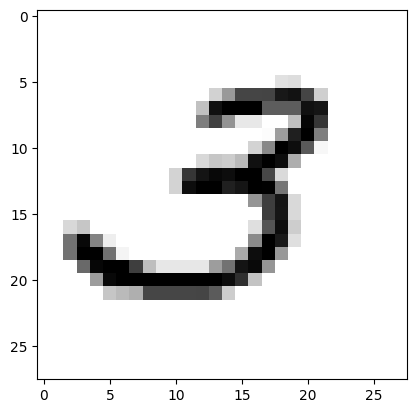

In [28]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter) #funçao fornecida dataiter.next(), porém atualmente a funçao next não é mais chamada desta forma, logo a solução é reformular como chamar a funçao next
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [29]:
print(imagens[0].shape) #para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #para verificar a dimensão do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [30]:
#indo atras do inception atraves do site https://keras.io/api/applications/inceptionv3/
# inception v3 utilizado pelo facebook para reconhecimento facial

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) #camada de entrada, 784 neuronios que se ligam a 128
        self.linear2 = nn.Linear(128, 64) # camada interna 1, 128 neuronios que se ligam a 64
        self.linear3 = nn.Linear(64, 10) # camada interna 2, 64 neuronios que se ligam a 10
        # para a camada de saída nao é necessario definir nada pois so precisamos pegar o output da camada interna 2

    def forward(self, x):
        x = F.relu(self.linear1(X)) # funcao de ativacao da camada de entrada para a camada interna 1
        x = F.relu(self.linear2(X)) # funcao de ativacao da camada interna 1 para a camada interna 2
        x = self.linear3(X) # funcao de ativacao da camada interna 2 para a camada de saida, nesse caso f(x) = x
        return F.log_softmax(X, dim=1) # dados utilizados para calcular a perda

In [31]:
def treino(modelo, trainloader, device):

    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) #define a politica de atualizacao dos pesos e da bias
    inicio - time() #timer para sabermos quanto tempo levou o treino

    criterio = nn. NLLLoss() #definindo o criterio para calcular a perda
    EPOCH = 10 #numero de epochs que o algoritmo rodará (epocas)
    modelo.train() #ativando o modo de treinamento do modelo

    for epoch in range(EPOCH):
        perda_acumulada = 0 #inicialização da perda acumulada da epoch em questao

        for imagens, etiquetas in trainloader:

            imagens = imagens.view(imagens.shape[0], -1) #convertendo as imagens para "vetores" de 28*28 casas para
            otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior

            output = modelo(imagens.to(device)) # colocando os dados no modelo
            perda_instantanea = criterio(output, etiquetas.to(device)) # calculando a perda da epoch em questao

            perda_instantanea.backward() # back propagation a partir da perda

            otimizador.step() #atualizando os pesos e a bias

            perda_acumulada += perda_instantanea.item() #atualizacao da perda acumulada

        else:
            print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader))) #printando a epoca e a perda resultante
    print("\nTempo de treino (em minutos) =", (time()-inicio/60))


In [32]:
def validacao(modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)
            #desativar o autograd para acelerar a validacao. Grafos computacionais dinamicos tem um custo alto de processamento
            with torch.no_grad():
                logps = modelo(img.to(device)) #output do modelo em escala logaritmica

            ps = torch.exp(logps) #converte output para escala normal (lembrando que é um tensor)
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab)) # converte o tensor em um numero, no caso, o numero que o modelo previu
            if (etiqueta_certa == etiqueta_pred): #compara a previsao com o valor correto
                conta_corretas += 1
            conta_todas

    print("Total de imagens testadas = ", conta_todas)
    print("\n Precisão do modelo = {}%".format(conta_corretas*100/conta_todas))

In [33]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #verificando se tem cuda disponivel para gpu
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)